In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pandas as pd
import joblib
import os

file_name = "../data/indian_liver_patient.csv"
if not os.path.exists(file_name):
    raise FileNotFoundError("File not found.Please check")

df = pd.read_csv(file_name)
df = df.dropna()
if df.isnull().sum().any():
    raise ValueError("File contains null value")

# Encode Gender with 0 or 1 value
lable = LabelEncoder()
df["Gender"] = lable.fit_transform(df["Gender"])

X = df.drop("Dataset",axis=1)
y = df["Dataset"]

# For dropping null values
# For scaling data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler_file = "../models/liver_scaler.pkl"

if os.path.exists(scaler_file):
    raise FileExistsError("File already exist.")
else:
    joblib.dump(scaler,scaler_file)

pd.DataFrame(df)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [2]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

file_name_pkl = "../models/liver_model.pkl"

if os.path.exists(file_name_pkl):
    raise FileExistsError("File already exist")
else:
    joblib.dump(model,file_name_pkl)
    print("Model trained and saved successfully!")


Model trained and saved successfully!


In [3]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
classification = classification_report(y_test,pred)

print("prediction : \n",pred,"\n")
print("accuracy:",accuracy,"\n")
print("classification \n", classification)

prediction : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1] 

accuracy: 0.6551724137931034 

classification 
               precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



confusion_matrix: 
 [[72  1]
 [39  4]]


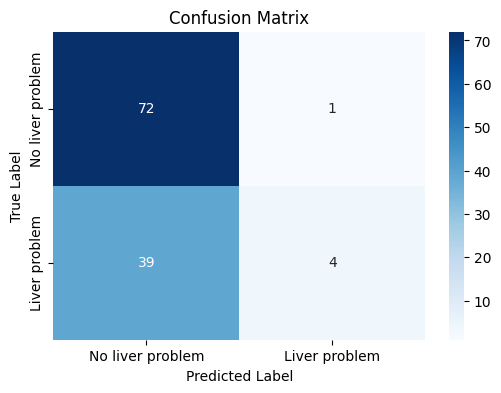

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,pred)
print("confusion_matrix: \n",cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues', xticklabels=["No liver problem", "Liver problem"], yticklabels=["No liver problem", "Liver problem"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Actual: [0, 73]
Predicted: [0, 111]


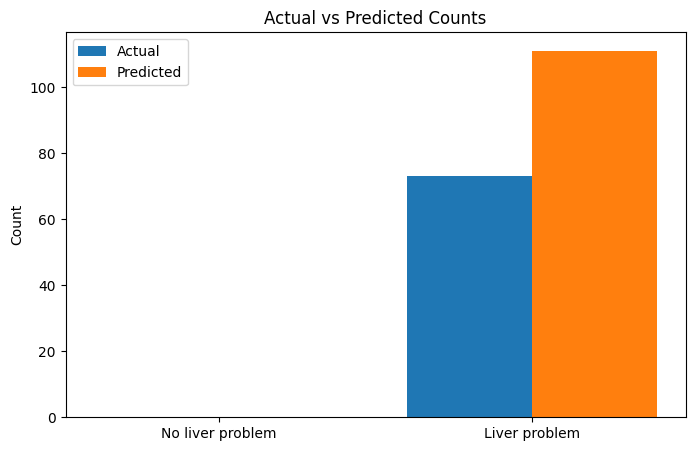

In [5]:
from collections import Counter
import numpy as np

y_pred = pred
count_pred = Counter(y_pred)
count_actual = Counter(y_test)

labels = ["No liver problem", "Liver problem"]
x = np.arange(len(labels))

actual = [count_actual[0], count_actual[1]]
pred_count = [count_pred[0], count_pred[1]]

print("Actual:", actual)
print("Predicted:", pred_count)

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, actual, width=0.4, label='Actual')
plt.bar(x + 0.2, pred_count, width=0.4, label='Predicted')
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Counts")
plt.legend()
plt.show()
